In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'flight.csv')

In [3]:
df.shape

(62988, 23)

In [4]:
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
14225,56735,2/14/2008,2/14/2008,Female,4,wuhanshi,hubei,CN,38.0,3/31/2014,...,4963.0,21803,9/17/2013,197,22.782609,107,4,0.764282,25474,20
34695,32610,9/3/2011,9/3/2011,Male,4,NaN,NaN,HK,50.0,3/31/2014,...,0.0,8346,6/5/2013,301,81.600000,203,0,0.718370,5179,0
504,60068,12/25/2011,12/25/2011,Male,6,beijing,beijing,CN,48.0,3/31/2014,...,23324.0,90731,3/24/2014,8,26.653846,118,0,1.010242,98430,0
6183,39994,3/20/2010,3/27/2010,Male,4,pudong,shanghai,CN,36.0,3/31/2014,...,10375.0,39878,2/12/2014,49,17.461538,81,2,0.753575,44678,38
49693,11141,4/21/2005,11/8/2005,Male,4,NaN,NaN,CN,45.0,3/31/2014,...,1729.0,5480,12/29/2013,94,70.555556,210,0,0.512000,1400,0


- Data yang di ambil merupakan data dari tahun 2014

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [6]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

# Handle Missing Values

In [7]:
# imputasi kolom numerikal dengan nilai rata-rata
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [8]:
# imputasi kolom kategorikal dengan nilai yang paling sering muncul
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [9]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

In [10]:
df.duplicated(subset=['MEMBER_NO']).sum()

0

# Handle Outliers

In [11]:
#Mengelompokkan data
cats= ["GENDER", "WORK_CITY", "WORK_PROVINCE","WORK_COUNTRY" ]
nums= ["FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM",
"SUM_YR_1",
"SUM_YR_2",
"SEG_KM_SUM",
"LAST_TO_END",
"AVG_INTERVAL",
"MAX_INTERVAL",
"EXCHANGE_COUNT",
"avg_discount",
"Points_Sum",
"Point_NotFlight" ]
nums_1=["FFP_TIER","AGE","FLIGHT_COUNT","BP_SUM",
"SUM_YR_1",
"SUM_YR_2",
"SEG_KM_SUM",
"LAST_TO_END"]
nums_2=["AVG_INTERVAL",
"MAX_INTERVAL",
"EXCHANGE_COUNT",
"avg_discount",
"Points_Sum",
"Point_NotFlight"]
date= ["FFP_DATE",
"FIRST_FLIGHT_DATE",
"LAST_FLIGHT_DATE",
"LOAD_TIME"]

In [12]:
from scipy.stats import zscore

# Assuming df is your DataFrame and col is the column you're filtering
print("Original DataFrame Shape:", df.shape)

# Initialize filtered_entries
filtered_entries = pd.Series(True, index=df.index)

for col in nums_1 + nums_2:
    z_scores = abs(zscore(df[col]))  # calculate absolute z-scores
    filtered_entries = (z_scores < 3) & filtered_entries  # keep values with absolute z-scores less than 3
    
# Filter the DataFrame
df_filtered = df[filtered_entries]

print("Filtered DataFrame Shape:", df_filtered.shape)


Original DataFrame Shape: (62988, 23)
Filtered DataFrame Shape: (54308, 23)


Dapat dilihat bahwa setelah dilakukan penghapusan oulier dengan menggunakan metode ZScore, sekitar 8000 data outlier sudah terhapus

#### Visualisasi After Handling Outlier

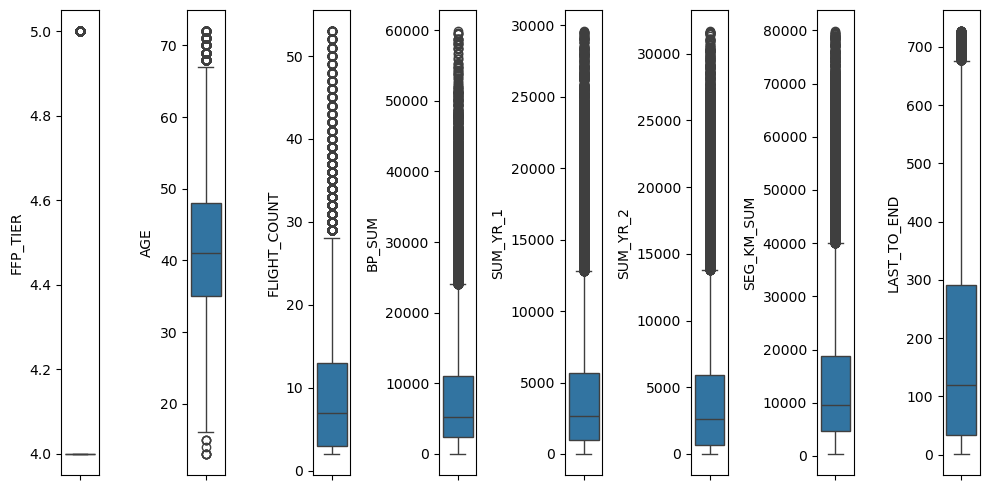

In [13]:
plt.figure(figsize=(10,5))
for i in range(0, len(nums_1)):
    plt.subplot(1, len(nums_1), i+1)
    sns.boxplot(y=df_filtered[nums_1[i]], orient='v')
    plt.tight_layout()

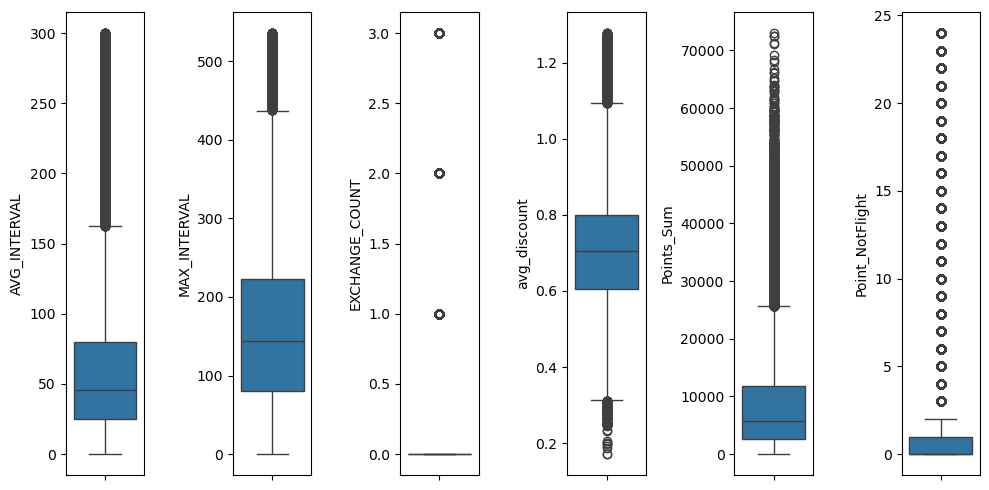

In [15]:
plt.figure(figsize=(10,5))
for i in range(0, len(nums_2)):
    plt.subplot(1, len(nums_2), i+1)
    sns.boxplot(y=df_filtered[nums_2[i]], orient='v')
    plt.tight_layout()

# Feature Transformation

## Feature Transformation pada kategori nums_1

### Before transformation

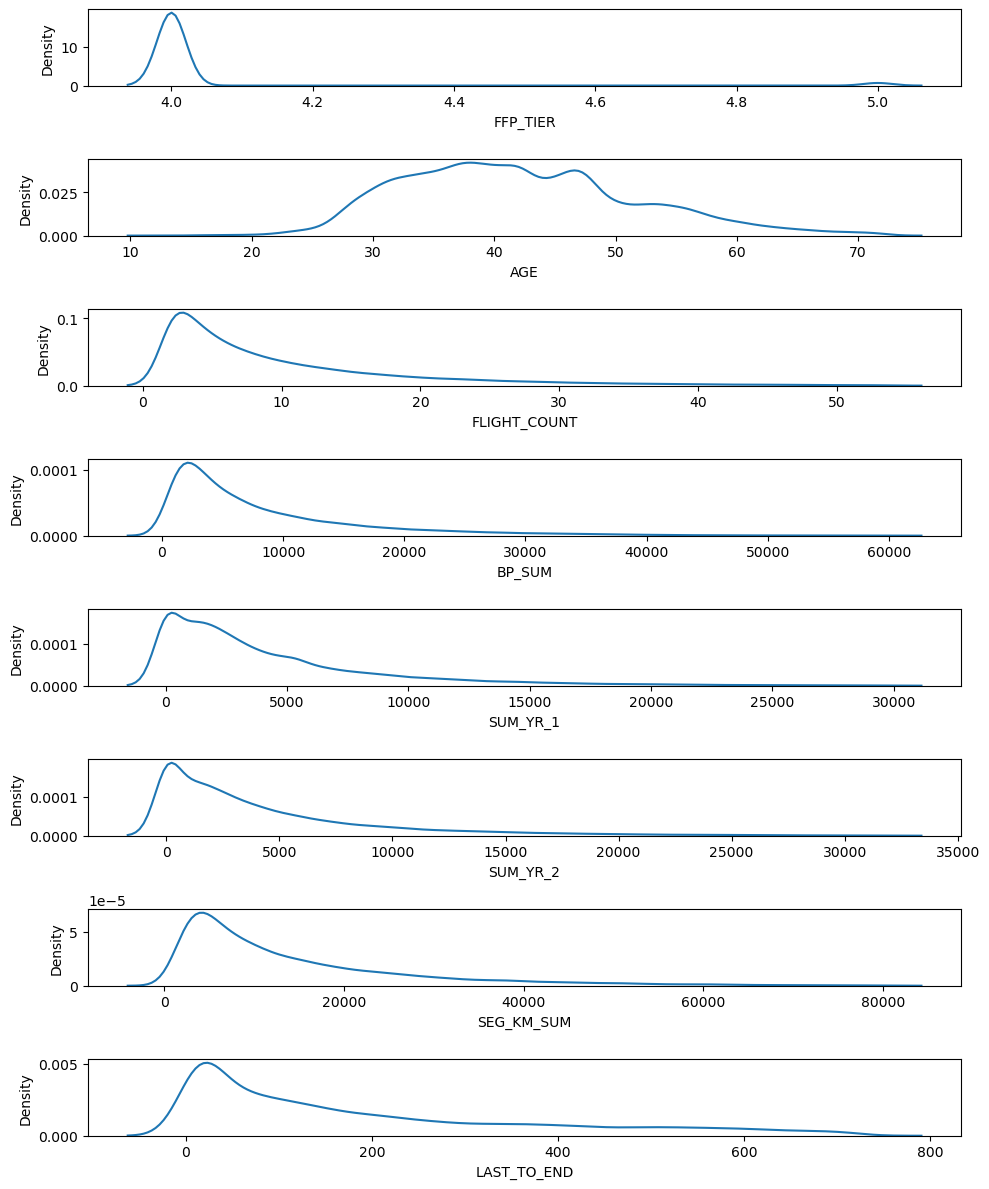

In [16]:
plt.figure(figsize=(10, 12))
for i in range(0, len(nums_1)):
    plt.subplot(len(nums_1), 1, i+1)
    sns.kdeplot(df_filtered[nums_1[i]])
    plt.tight_layout()

### After Transformation

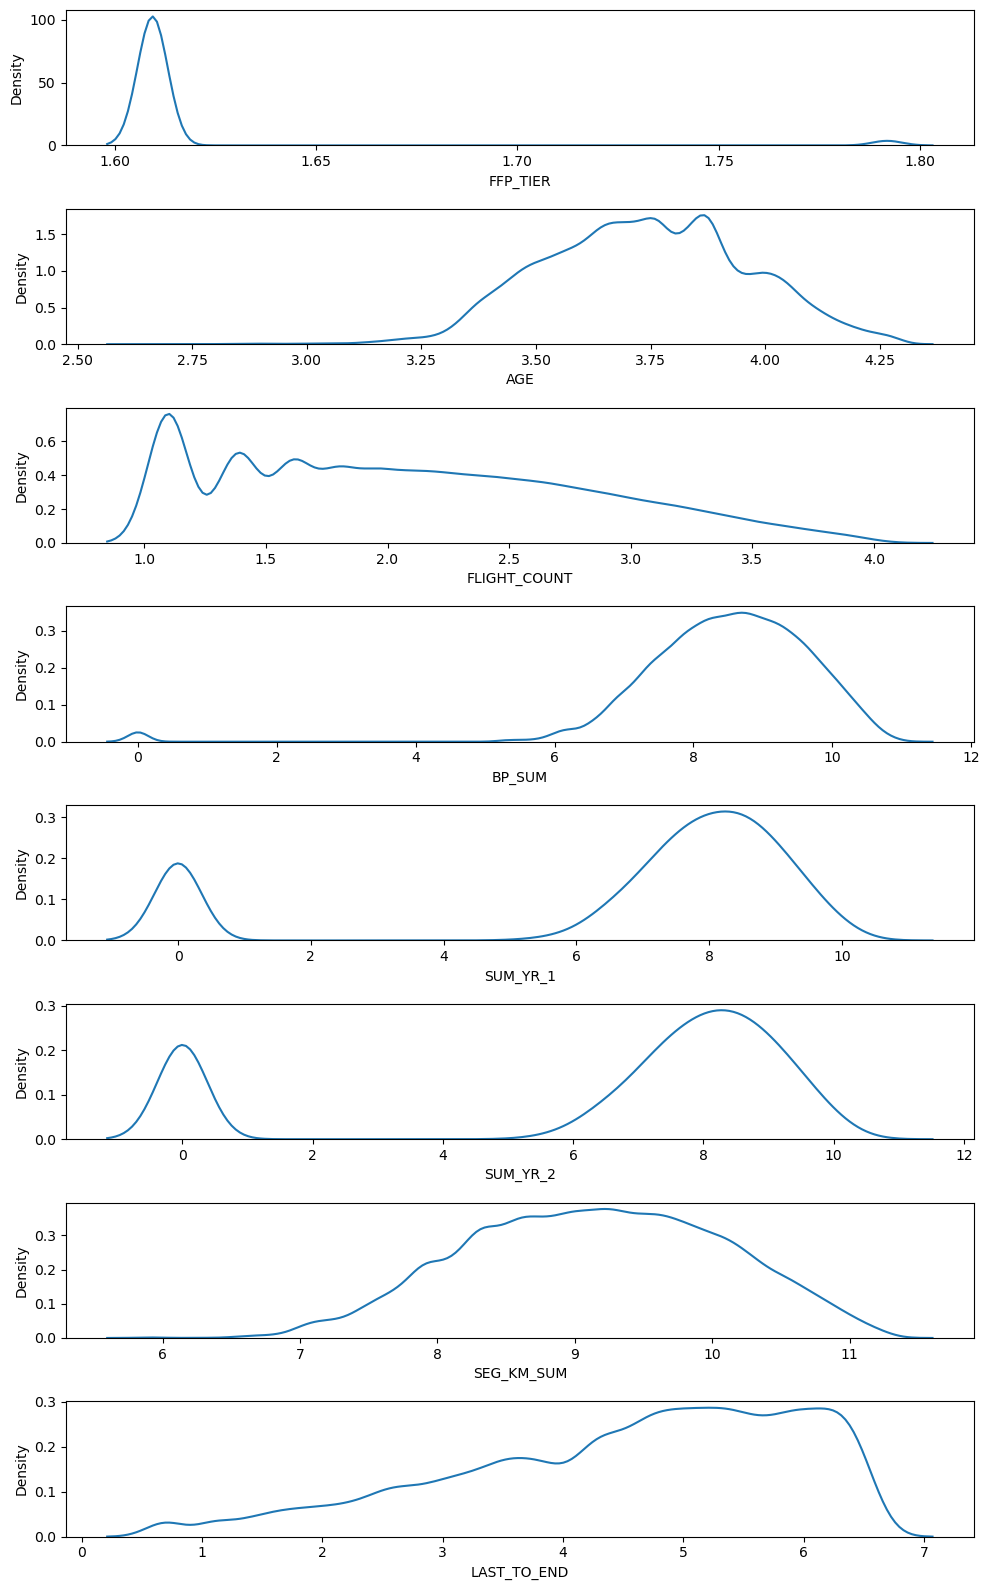

In [17]:
plt.figure(figsize=(10, 16))
for i in range(0, len(nums_1)):
    # Do Log Transformation
    df_filtered[nums_1[i]] = np.log1p(df_filtered[nums_1[i]])
   
    # Plot the result
    plt.subplot(len(nums_1), 1, i+1)
    sns.kdeplot(df_filtered[nums_1[i]])
    plt.tight_layout()

## Feature Transformation pada kategori nums_2

### Before Transformation

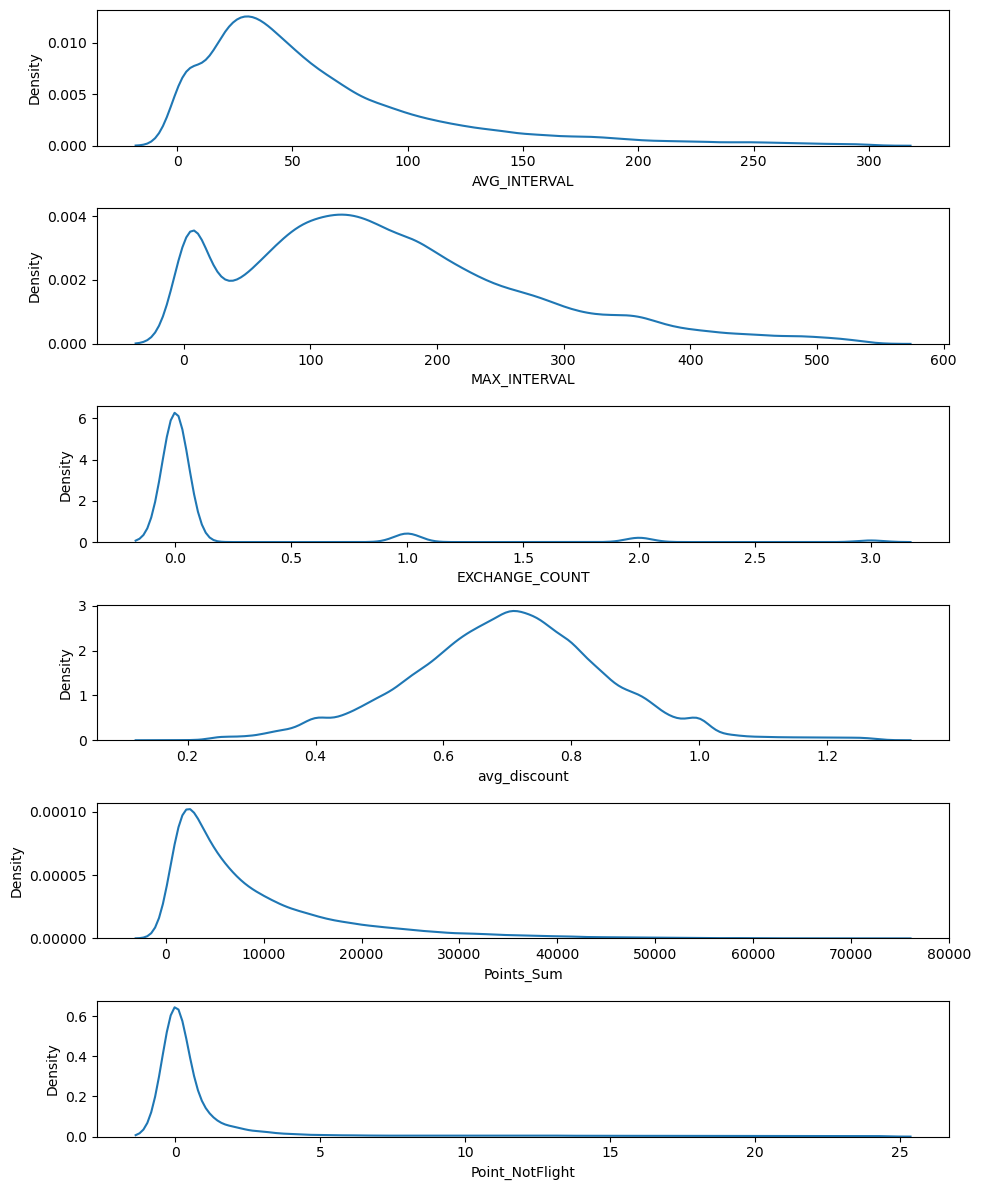

In [18]:
plt.figure(figsize=(10, 12))
for i in range(0, len(nums_2)):
    plt.subplot(len(nums_2), 1, i+1)
    sns.kdeplot(df_filtered[nums_2[i]])
    plt.tight_layout()

### After Transformation

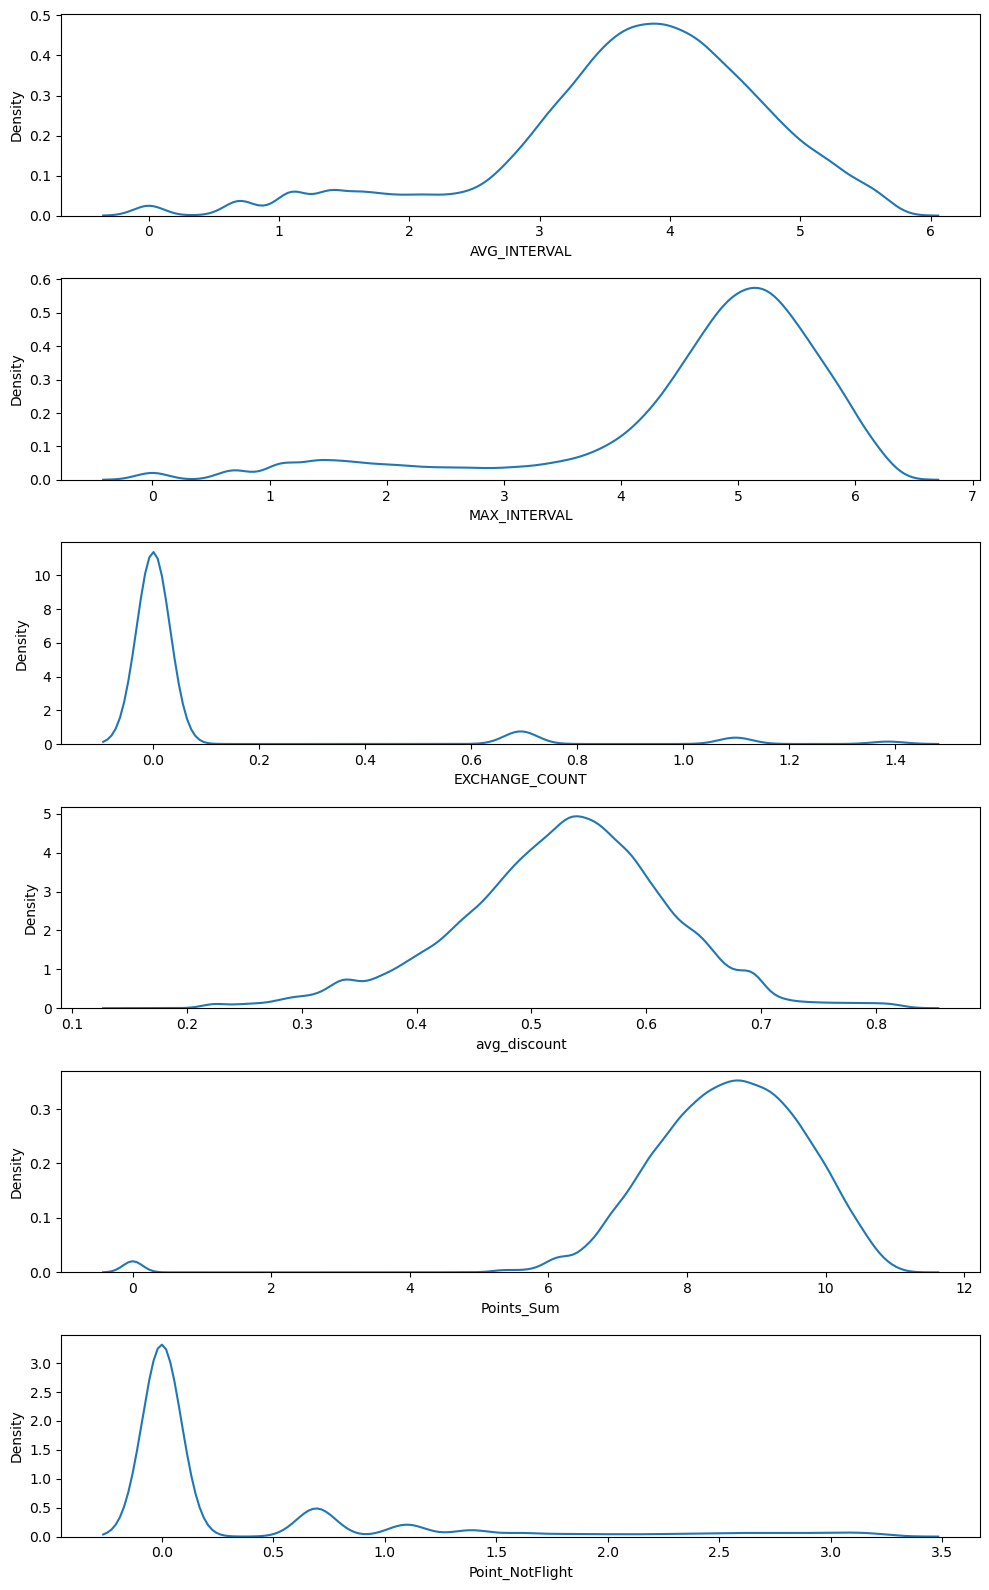

In [19]:
plt.figure(figsize=(10, 16))
for i in range(0, len(nums_2)):
    # Do Log Transformation
    df_filtered[nums_2[i]] = np.log1p(df_filtered[nums_2[i]])
   
    # Plot the result
    plt.subplot(len(nums_2), 1, i+1)
    sns.kdeplot(df_filtered[nums_2[i]])
    plt.tight_layout()

Dapat dilihat bahwa hampir seluruh kolom pada kategori nums_1 dan nums_2 kecuali kolom 'AGE' dan 'avg_discount' memiliki skewed distribution dan memiliki skala distribusi yang sangat jauh, karena itu dilakukan log transform untuk membuat distribusi lebih simetrik dan menyamakan skala setiap kolum


# Feature Encoding

In [20]:
df_filtered.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
54642,4949,9/23/2011,9/23/2011,Male,1.609438,nanjing,jiangsu,CN,3.496508,3/31/2014,...,0.000000,8.023880,5/3/2012,6.551080,2.833213,2.833213,0.000000,0.515813,7.387709,0.000000
17131,17827,6/4/2007,6/4/2007,Female,1.609438,changchun,jilin,CN,3.806662,3/31/2014,...,8.954803,9.967307,2/26/2014,3.583519,4.285883,6.109248,0.693147,0.510923,9.469391,0.693147
7136,48198,9/19/2009,9/19/2009,Male,1.609438,chaozhou,guangdong,CN,3.367296,3/31/2014,...,0.000000,10.592325,1/29/2013,6.061457,2.629269,3.496508,0.000000,0.525001,9.888222,0.693147
25822,38675,2/19/2007,9/19/2007,Male,1.609438,guangzhou,guangdong,CN,3.891820,3/31/2014,...,9.095603,9.712630,3/30/2014,1.098612,3.226122,4.672829,0.000000,0.440815,9.154405,1.098612
47858,20515,4/20/2007,7/24/2012,Female,1.609438,beijing,beijing,CN,3.828641,3/31/2014,...,0.000000,8.125039,12/13/2012,6.165418,4.276666,4.727388,0.000000,0.653598,7.914983,0.000000


In [21]:
df_filtered[cats].describe()

,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY
count,54308,54308,54308,54308
unique,2,2909,1044,113
top,Male,guangzhou,guangdong,CN
freq,41234,9465,17200,49795


### Mapping Gender

In [22]:
# Membuat mapping dari kategori ke nilai numerik
gender_mapping = {'Male': 0, 'Female': 1}
df_filtered['GENDER'] = df_filtered['GENDER'].map(gender_mapping)

Feature encoding akan dilakukan pada fitur kategorikal yaitu fitur 'Gender'agar fitur dapat direpresentasikan sebagai fitur numerik

# Feature Extraction

#### Average interval waktu penerbangan
Menghitung rata-rata Durasi per Flight 

In [23]:
# Ubah tipe data ke datetime
df_filtered['FIRST_FLIGHT_DATE'] = pd.to_datetime(df_filtered['FIRST_FLIGHT_DATE'], errors='coerce')
df_filtered['LAST_FLIGHT_DATE'] = pd.to_datetime(df_filtered['LAST_FLIGHT_DATE'], errors='coerce')

# Sort tanggal
df_filtered.sort_values(by='FIRST_FLIGHT_DATE', inplace=True)

# Mengisi tanggal yang tidak valid dengan nilai disekitarnya
df_filtered[['FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE']] = df_filtered[['FIRST_FLIGHT_DATE', 'LAST_FLIGHT_DATE']].fillna(method='ffill')

# Hitung rata-rata durasi per flight
df_filtered['Avg_Duration_Per_Flight'] = np.log1p((df_filtered['LAST_FLIGHT_DATE'] - df_filtered['FIRST_FLIGHT_DATE']).dt.days / df_filtered['FLIGHT_COUNT'])

# Membuat bins untuk mengelompokkan customer berdasarkan durasi per flight
df_filtered['Avg_Duration_Per_Flight_Bin'] = pd.cut(df_filtered.groupby('MEMBER_NO')['Avg_Duration_Per_Flight'].transform('sum'), bins=3, labels=False)


#### Frequency
Menghitung frekuensi penerbangan customer setahun terakhir

In [24]:
# Mengubah kolom LOAD_TIME menjadi tipe data datetime
df_filtered['LOAD_TIME'] = pd.to_datetime(df_filtered['LOAD_TIME'], errors='coerce')

# Filter data untuk menyertakan hanya entri dalam satu tahun terakhir
start_date = df_filtered['LOAD_TIME'].max() - pd.DateOffset(years=1)
df_last_year = df_filtered[df_filtered['LOAD_TIME'] >= start_date]

# Hitung FREKUENSI PENERBANGAN setahun terakhir untuk setiap pelanggan
flight_counts = df_last_year.groupby('MEMBER_NO')['FLIGHT_COUNT'].sum()
df_filtered['FLIGHT_COUNT_Last_Year'] = df_filtered['MEMBER_NO'].map(flight_counts)

# Membuat bins untuk mengelompokkan customer berdasarkan frekuensi penerbangan selama satu tahun terakhir
df_filtered['FLIGHT_COUNT_Last_Year'] = pd.cut(df_filtered['FLIGHT_COUNT_Last_Year'], bins=3, labels=False)



#### Monetary 
Menghitung Total Pengeluaran Customer Setahun Terakhir

In [25]:
# Hitung total pengeluaran satu tahun terakhir untuk setiap pelanggan
total_expenditure_last_year = df_last_year.groupby('MEMBER_NO')['SUM_YR_1'].sum()

# Update total pengeluaran satu tahun terakhir dalam df_filtered
df_filtered['total_expenditure_last_year'] = df_filtered['MEMBER_NO'].map(total_expenditure_last_year)

#### Recency 
Kapan terakhir kali customer melakukan transaksi? (Dalam jumlah hari)

In [26]:
df_filtered['recency_last_year'] = df_filtered['LOAD_TIME']-df_filtered['LAST_FLIGHT_DATE']

### Apply Binning
Pada fitur 'AGE', 'avg_discount', 'Points_Sum', dan 'EXCHANGE_COUNT' akan dilakukan dilakukan labeling sesuai dengan quantile masing-masing fitur

In [27]:
# Menggunakan pd.qcut untuk membuat bins pada kolom 'AGE'
df_filtered['age_bin'] = pd.qcut(df_filtered['AGE'], q=5, labels=False)

# Menggunakan pd.qcut untuk membuat bins pada kolom 'avg_discount'
df_filtered['avg_discount_level'] = pd.qcut(df_filtered['avg_discount'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah poin 
df_filtered['Points_Sum_level'] = pd.qcut(df_filtered['Points_Sum'], q=5, labels=False)

# Membuat bins untuk mengelompokan jumlah penukaran poin 
df_filtered['exchange_count_bin'] = pd.cut(df_filtered['EXCHANGE_COUNT'], bins=4, labels=False)

In [28]:
df_filtered.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,Point_NotFlight,Avg_Duration_Per_Flight,Avg_Duration_Per_Flight_Bin,FLIGHT_COUNT_Last_Year,total_expenditure_last_year,recency_last_year,age_bin,avg_discount_level,Points_Sum_level,exchange_count_bin
46953,56073,11/3/2004,2004-11-03,0,1.609438,taibeishi,taiwansheng,CN,3.761200,2014-03-31,...,0.000000,7.669476,2,0,8.014666,467 days,2,1,1,0
39543,47083,11/5/2004,2004-11-05,0,1.609438,shenzhen,guangdongsheng,CN,4.204693,2014-03-31,...,0.693147,7.638024,2,0,6.752270,94 days,4,2,2,0
14063,47070,11/7/2004,2004-11-07,1,1.609438,guangzhoushi,guangdongsheng,CN,3.610918,2014-03-31,...,0.000000,7.183564,2,1,8.535230,54 days,1,1,4,0
52052,47072,11/11/2004,2004-11-11,0,1.609438,changshashi,hunansheng,CN,3.610918,2014-03-31,...,0.693147,7.621422,2,0,6.792344,143 days,1,3,1,0
13445,2022,11/12/2004,2004-11-13,1,1.609438,guangzhoushi,guangdongsheng,CN,3.806662,2014-03-31,...,2.995732,6.929362,2,2,9.422059,99 days,2,3,4,3
